# Predicting

In [1]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space
from MapSci.entities import entities
import MapSci.agg as agg
import MapSci.predict as pr

import numpy as np
import matplotlib.pyplot as plt

In [10]:
import scipy.stats as stats
import numpy as np

TEXT

In [2]:
pp = papers("lattes")
maps = research_space("lattes", pp)
maps.compute(1999, 2013)

guevara(1999, 2013, 0.1)
chinazzi(1999, 2013, 0.1, 200)


In [3]:
presence = pp.presence(2011, 2013)
indices = maps.phi["guevara(1999, 2013, 0.1)"][1]
scientists = entities(presence, indices)

In [4]:
inst, st = agg.get_insts(scientists.set, "../dataset/lattes/pesquisadores.csv", sep=";sep;")

xi = agg.aggregate(presence[1], inst)
presence_inst = pp.presence(2011, 2013, x=xi)
institutions = entities(presence_inst, indices)

xs = agg.aggregate(presence[1], st)
presence_st = pp.presence(2011, 2013, x=xs)
states = entities(presence_st, indices)

### Prediction

In [5]:
guev = maps.phi["guevara(1999, 2013, 0.1)"][0]
chin = maps.phi["chinazzi(1999, 2013, 0.1, 200)"][0]
spaces = [guev, chin]

*evaluating the transition from an inactive to an active state*

In [16]:
# Laender
scientists.predict(9089204821424223, guev, 'inactive-active')[:10]

[(0.38988, 'logic'),
 (0.35969, 'museology'),
 (0.32463, 'management information systems'),
 (0.27967, 'e-learning'),
 (0.27764, 'signal processing'),
 (0.27498, 'control and optimization'),
 (0.26516, 'media technology'),
 (0.25271, 'decision sciences (miscellaneous)'),
 (0.25026, 'human-computer interaction'),
 (0.24755, 'discrete mathematics and combinatorics')]

### Accuracy

TEXT

In [7]:
spaces = [guev, chin]
ground_truth = pp.presence(2014, 2016)
scientists_future = entities(ground_truth, indices)

TEXT

In [8]:
xs = agg.aggregate(ground_truth[1], st)
presence_st_future = pp.presence(2014, 2016, x=xs)
states_future = entities(presence_st_future, indices)

In [9]:
xi = agg.aggregate(ground_truth[1], inst)
presence_inst_future = pp.presence(2014, 2016, x=xi)
institutions_future = entities(presence_inst_future, indices)

55869 out of 116677 scores couldn't be computed.


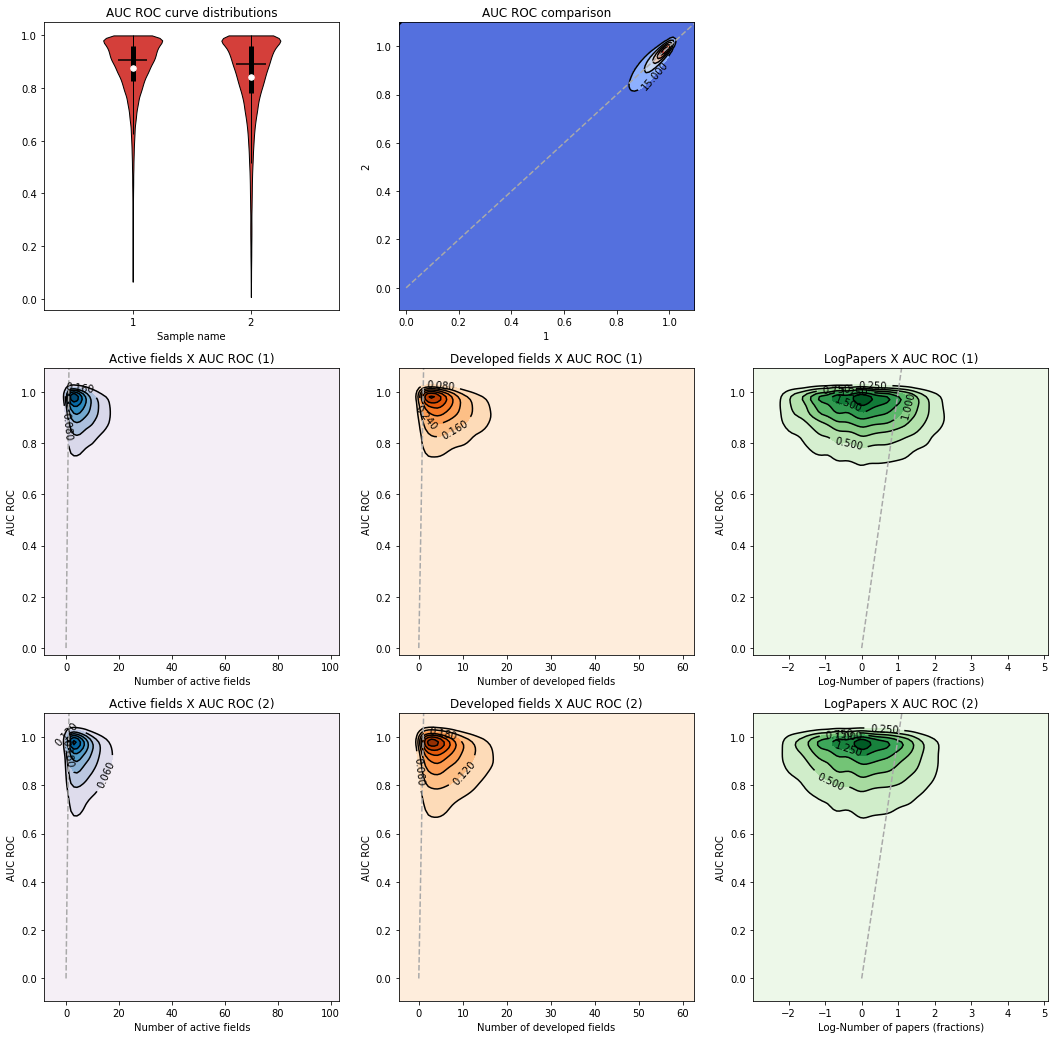

Anova: F_onewayResult(statistic=1522.5647993849898, pvalue=0.0)
Sample size: 60808
Max value [1.0, 1.0]
Mean value [0.8750110866633939, 0.8432307018235963]
Median value [0.9070007089742955, 0.8903654485049834]
Min value [0.06478405315614616, 0.00692041522491349]

Fração menor que 0.5 [0.017810156558347588, 0.04657281936587291]
Fração que foi melhor [0.5967800289435601, 0.3772365478226549]
Fração que foi melhor, acima de 0.5 [0.5829136161448327, 0.3898090935839521]


In [11]:
auc, computed = pr.predict_all(scientists, spaces, indices, 'inactive-active', scientists_future)
pr.plot_comp(auc, scientists, computed)
pr.summary(auc)

# PLOT AUC ROC CURVE

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
auc1, computed = pr.predict_all(scientists, spaces, indices, 'inactive-active', scientists_future)
auc2, computed = pr.predict_all(institutions, spaces, indices, 'inactive-active', institutions_future)
auc3, computed = pr.predict_all(states, spaces, indices, 'inactive-active', states_future)
auc4, computed = pr.predict_all(institutions, spaces, indices, 'nascent-developed', institutions_future)
auc5, computed = pr.predict_all(states, spaces, indices, 'nascent-developed', states_future)
auc6, computed = pr.predict_all(institutions, spaces, indices, 'intermediate-developed', institutions_future)

55869 out of 116677 scores couldn't be computed.
5503 out of 10641 scores couldn't be computed.
1 out of 27 scores couldn't be computed.
10013 out of 10641 scores couldn't be computed.
2 out of 27 scores couldn't be computed.
9818 out of 10641 scores couldn't be computed.


ValueError: intermediate-active is not a transition.

In [179]:
auc7, computed = pr.predict_all(states, spaces, indices, 'intermediate-developed', states_future)

aucs = [auc1, auc2, auc3, auc3, auc4, auc5, auc6, auc7]
np.save("__rscache__/aucs.npy", aucs, allow_pickle=True)

0 out of 27 scores couldn't be computed.


In [9]:
# aucs = np.load("__rscache__/aucs.npy", allow_pickle=True).tolist()
# aucs = aucs[:3]+aucs[4:]

# aucs = np.load("__rscache__/aucs1996,2008,2010,2013.npy", allow_pickle=True).tolist()
aucs = np.load("old plots/novos/aucs1999,2011,2013,2016.npy", allow_pickle=True).tolist()

In [13]:
aux = list()
for a in aucs:
    aux += a
aucs = aux

In [14]:
np.array([np.percentile(x, [25, 75]).tolist() for x in aucs]).T

array([[0.83389831, 0.75899645, 0.79391247, 0.71998289, 0.54424895,
        0.54365079, 0.5       , 0.5       , 0.45      , 0.50226244,
        0.49908088, 0.48315972, 0.57498592, 0.54342317],
       [0.96219931, 0.96013289, 0.94871795, 0.9400689 , 0.69164457,
        0.68053336, 0.85508333, 0.86425061, 0.66666667, 0.67777778,
        0.80263158, 0.83333333, 0.67530846, 0.66259812]])

In [11]:
def __adj_val(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, max(vals))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, min(vals), q1)
    return lower_adjacent_value, upper_adjacent_value

def __axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

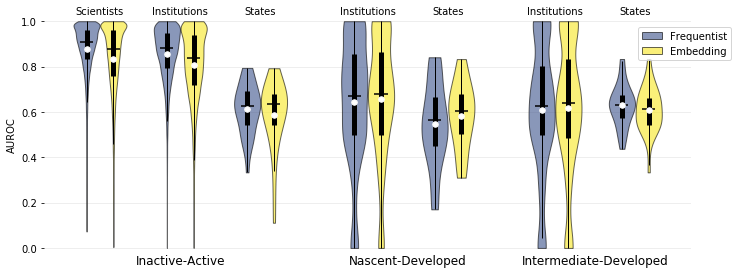

In [15]:
plt.rcParams["figure.figsize"] = (9.8,4)
ax = plt.subplot(1,1,1)
# ax.set_title("AUC ROC curve distributions")
pos = np.array([1,2,4,5,7,8,11,12,14,15,18,19,21,22])/22 * 13.5 + 0.5
parts = ax.violinplot(aucs, positions=pos, showmeans=False, showmedians=True, showextrema=False, widths=0.6, points=1000)

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    if i%2 ==0:
        pc.set_facecolor(plt.cm.viridis(0.25))
    else:
        pc.set_facecolor(plt.cm.viridis(0.99))
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
    pc.set_zorder(2)
parts["cmedians"].set_edgecolor('black')

# mean = np.mean(aucs, axis=1)
mean = [np.mean(x) for x in aucs]
# q1, q3 = np.percentile(aucs, [25, 75], axis=1)
q1, q3 = np.array([np.percentile(x, [25, 75]).tolist() for x in aucs]).T
whiskers = np.array([__adj_val(vals, qq1, qq3) for vals, qq1, qq3 in zip(aucs, q1, q3)])
wMin, wMax = whiskers[:,0], whiskers[:,1]

ax.scatter(pos, mean, marker='o', color='white', s=30, zorder=4)
ax.vlines(pos, q1, q3, color='k', linestyle='-', lw=5, zorder=3)
ax.vlines(pos, wMin, wMax, color='k', linestyle='-', lw=1, zorder=3)
# __axis_style(ax, [str(i) for i in inds])

plt.ylabel('AUROC')
plt.xlabel("")
plt.box(False)
plt.tight_layout()

ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.text((pos[2]+pos[3])/2, -0.07, "Inactive-Active", size=12, ha='center')
plt.text((pos[7]+pos[8])/2, -0.07, "Nascent-Developed", size=12, ha='center')
plt.text((pos[11]+pos[12])/2, -.07, "Intermediate-Developed", size=12, ha='center')

plt.text((pos[0]+pos[1])/2, 1.03, "Scientists", size=10, ha='center')
plt.text((pos[2]+pos[3])/2, 1.03, "Institutions", size=10, ha='center')
plt.text((pos[4]+pos[5])/2, 1.03, "States", size=10, ha='center')

plt.text((pos[6]+pos[7])/2, 1.03, "Institutions", size=10, ha='center')
plt.text((pos[8]+pos[9])/2, 1.03, "States", size=10, ha='center')

plt.text((pos[10]+pos[11])/2, 1.03, "Institutions", size=10, ha='center')
plt.text((pos[12]+pos[13])/2, 1.03, "States", size=10, ha='center')

plt.legend(['Frequentist', 'Embedding'],bbox_to_anchor=(1.07, .95))

plt.savefig("new plots/aucs.pdf",bbox_inches='tight')

In [10]:
# aucs = np.load("__rscache__/aucs.npy", allow_pickle=True).tolist()
# aucs = aucs[:3]+aucs[4:]

aucs = np.load("__rscache__/aucs1996,2008,2010,2013.npy", allow_pickle=True).tolist()

In [13]:
for pair in aucs:
    pr.summary(pair)
    print("\n\n\n")

Anova: F_onewayResult(statistic=2762.2353572229695, pvalue=0.0)
Sample size: 54651
Max value [1.0, 1.0]
Mean value [0.879364798039124, 0.834925470110735]
Median value [0.9097472924187726, 0.8784722222222222]
Min value [0.07216494845360821, 0.0034843205574912606]

Fração menor que 0.5 [0.015040895866498327, 0.04545205028270297]
Fração que foi melhor [0.6546266308027301, 0.31979286746811586]
Fração que foi melhor, acima de 0.5 [0.6436699720804853, 0.32943101954366033]




Anova: F_onewayResult(statistic=252.48940618392072, pvalue=4.007656009868592e-56)
Sample size: 4688
Max value [1.0, 1.0]
Mean value [0.8553782845235808, 0.8085740026695641]
Median value [0.8831079314950283, 0.8368935788864614]
Min value [0.0, 0.0]

Fração menor que 0.5 [0.016851535836177475, 0.04778156996587031]
Fração que foi melhor [0.691339590443686, 0.2888225255972696]
Fração que foi melhor, acima de 0.5 [0.6838666065795403, 0.2954033348355115]




Anova: F_onewayResult(statistic=0.4979556110388087, pvalue=0.4836746

# KERNELS


In [11]:
auc2, computed = pr.predict_all(institutions, spaces, indices, 'inactive-active', institutions_future)
np.save("__rscache__/auc2_computed_1999_new.npy", [auc2, computed], allow_pickle=True)

3295 out of 7983 scores couldn't be computed.


In [11]:
auc2, computed = np.load("__rscache__/auc2_computed_1999_new.npy", allow_pickle=True)

In [18]:
7983 - len(auc2[0])

3295

In [12]:
def gaussian(ax, x, y, xlab, ylab, title, cmap='coolwarm', iden=False):
    """
    """
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    if iden:
        ax.plot([0, xmax], [0, xmax], "--", color="darkgrey")
    
    cfset = ax.contourf(xx, yy, f, cmap=cmap)
    ax.imshow(np.rot90(f), cmap=cmap,
        extent=[xmin, xmax, ymin, ymax], aspect='auto')
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    plt.title(title, fontsize=14)
    plt.box(False)
    plt.tight_layout()
    ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
    ax.yaxis.grid(zorder=-1)
    ax.xaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
    ax.xaxis.grid(zorder=-1)

525


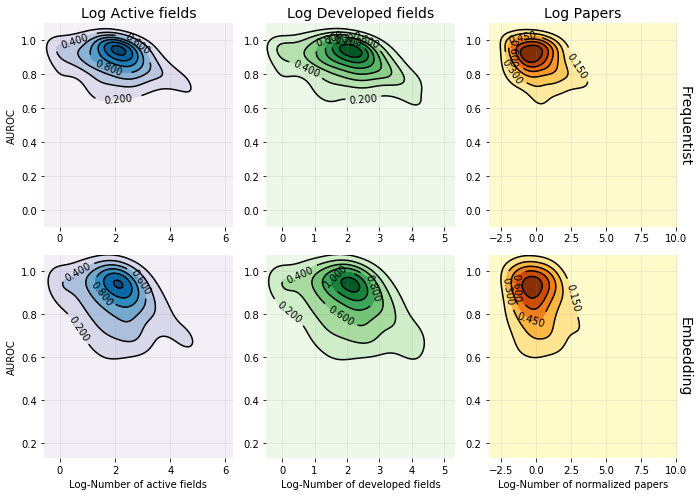

In [14]:
auc = auc2

p = 500/sum(computed)
# p = 1

X, areas = institutions.info()
X = [X[i] for i in range(len(X)) if computed[i]]
areas = [[a[i] for i in range(len(a)) if computed[i]] for a in areas]

new_auc = [list(),list()]
new_X = list()
new_areas = [list(),list()]
for i in range(sum(computed)):
    if np.random.binomial(1,p):
        new_auc[0].append(auc[0][i])
        new_auc[1].append(auc[1][i])
        new_X.append(X[i])
        new_areas[0].append(areas[0][i])
        new_areas[1].append(areas[1][i])

auc = new_auc
X = new_X
areas = new_areas

print(len(auc[0]))
        

# Plots
plt.rcParams["figure.figsize"] = (9.8, 7)

ax = plt.subplot(2,3,1)
gaussian(ax, np.log(areas[0]), auc[0], "",
    "AUROC", "Log Active fields", 'PuBu')
ax = plt.subplot(2,3,4)
gaussian(ax, np.log(areas[0]), auc[1], "Log-Number of active fields",
    "AUROC", "", 'PuBu')

ax = plt.subplot(2,3,2)
gaussian(ax, np.log(areas[1]), auc[0], "",
    "", "Log Developed fields", 'Greens')
ax = plt.subplot(2,3,5)
gaussian(ax, np.log(areas[1]), auc[1], "Log-Number of developed fields",
    "", "", 'Greens')

ax = plt.subplot(2,3,3)
gaussian(ax, np.log(X), auc[0], "",
    "", "Log Papers", 'YlOrBr')
ax.yaxis.set_label_position("right")
plt.ylabel('Frequentist', fontsize=14, rotation=-90, labelpad=14)

ax = plt.subplot(2,3,6)
gaussian(ax, np.log(X), auc[1], "Log-Number of normalized papers",
    "", "", 'YlOrBr')
ax.yaxis.set_label_position("right")
plt.ylabel('Embedding', fontsize=14, rotation=-90, labelpad=14)

plt.show()
# plt.savefig("new plots/kernel.pdf",bbox_inches='tight')

## Teste Variância

In [23]:
def var(xs, ys, labs, janela=200):  
    plt.rcParams["figure.figsize"] = (9.8, 3.5)
    
    j = 1
    for x in xs:
        ax = plt.subplot(1,3,j)
        trac = True
        for y in ys:
            pairs = sorted([(x[i], y[i]) for i in range(len(x))])
            yss = [a[1] for a in pairs]
            res = list()
            for i in range(len(yss)-janela+1):
                curr = yss[i:i+janela]
                res.append(np.std(curr)/np.mean(curr))

            if trac:    
                ax.plot(res,lw=2, zorder=1, color=plt.cm.viridis(0), linestyle=(0, (1,1)))
                trac = False
            else:
                ax.plot(res,lw=2, zorder=1, color=plt.cm.viridis(.7))


        ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
        ax.yaxis.grid(zorder=0)
        ax.xaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
        ax.xaxis.grid(zorder=0)     
            
        ax.set_title(labs[j-1])
        ax.set_xlabel("First element of window")
        
        plt.box(False)

        if j == 1:
            ax.set_ylabel("Coefficient of Variation")
            ax.legend(["Frequentist", "Embedding"])
            
        j += 1
#       
    plt.tight_layout()

In [19]:
def mena(xs, ys, labs, janela=200):  
    plt.rcParams["figure.figsize"] = (9.8, 3.5)
    
    j = 1
    for x in xs:
        ax = plt.subplot(1,3,j)
        trac = True
        for y in ys:
            pairs = sorted([(x[i], y[i]) for i in range(len(x))])
            yss = [a[1] for a in pairs]
            res = list()
            for i in range(len(yss)-janela+1):
                curr = yss[i:i+janela]
                res.append(np.mean(curr))

            if trac:    
                ax.plot(res,lw=2, zorder=1, color=plt.cm.viridis(0), linestyle=(0, (1,1)))
                trac = False
            else:
                ax.plot(res,lw=2, zorder=1, color=plt.cm.viridis(.7))


        ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
        ax.yaxis.grid(zorder=0)
        ax.xaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
        ax.xaxis.grid(zorder=0)     
            
        ax.set_title(labs[j-1])
        ax.set_xlabel("First element of window")
        
        plt.box(False)

        if j == 1:
            ax.set_ylabel("Coefficient of Variation")
            ax.legend(["Frequentist", "Embedding"])
            
        j += 1
#       
    plt.tight_layout()

In [16]:
X, areas = institutions.info()
X = [X[i] for i in range(len(X)) if computed[i]]
areas = [[a[i] for i in range(len(a)) if computed[i]] for a in areas]

In [17]:
x1 = np.log(areas[0])
x2 = np.log(areas[1])
x3 = np.log(X)

y1 = auc2[0]
y2 = auc2[1]

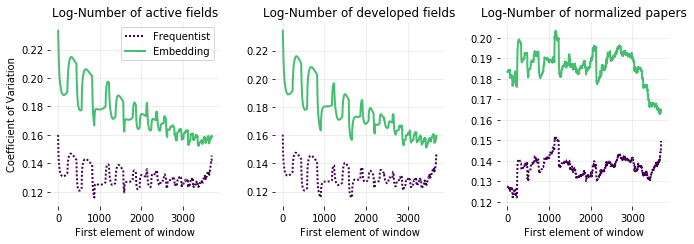

In [24]:
janela = 1000
var([x1, x2, x3], [y1,y2], ["Log-Number of active fields", "Log-Number of developed fields", "Log-Number of normalized papers"], janela)
plt.savefig("new plots/cv.pdf", bbox_inches='tight')

# N DIMENSIONS

In [5]:
nvals = [1,2,3,4,5,7,10,15,20,25,30,50,75,100,150,200]
for n in nvals:
    maps.compute(2000, 2013, model="chinazzi", N=n)

In [4]:
spaces = [
    "chinazzi(2000, 2013, 0.1, 1)",
    "chinazzi(2000, 2013, 0.1, 2)",
    "chinazzi(2000, 2013, 0.1, 3)",
    "chinazzi(2000, 2013, 0.1, 4)",
    "chinazzi(2000, 2013, 0.1, 5)",
    "chinazzi(2000, 2013, 0.1, 7)",
    "chinazzi(2000, 2013, 0.1, 10)",
    "chinazzi(2000, 2013, 0.1, 15)",
    "chinazzi(2000, 2013, 0.1, 20)",
    "chinazzi(2000, 2013, 0.1, 25)",
    "chinazzi(2000, 2013, 0.1, 30)",
    "chinazzi(2000, 2013, 0.1, 50)",
    "chinazzi(2000, 2013, 0.1, 75)",
    "chinazzi(2000, 2013, 0.1, 100)",
    "chinazzi(2000, 2013, 0.1, 150)",
    "chinazzi(2000, 2013, 0.1, 200)"
]

spaces = [maps.phi[ss][0] for ss in spaces]

In [36]:
auc, computed = pr.predict_all(scientists, spaces, indices, 'inactive-active', scientists_future)

55869 out of 116677 scores couldn't be computed.


In [42]:
np.save("__rscache__/Nauc.npy", auc, allow_pickle=True)
np.save("__rscache__/Ncomputed.npy", computed, allow_pickle=True)

In [23]:
auc = np.load("old plots/novos/dims_auc1999,2011,2013,2016.npy", allow_pickle=True)

In [24]:
nvals = [1,2,3,4,5,7,10,15,20,25,30,50,75,100,150,200,300,400]

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
med = np.percentile(auc, [25, 50, 75], axis=1)
med

array([[0.40822072, 0.41317494, 0.48937179, 0.5544996 , 0.65244838,
        0.70634241, 0.7218534 , 0.76399797, 0.77440254, 0.76965215,
        0.77854671, 0.77825589, 0.77305435, 0.77988447, 0.78114478,
        0.78452989, 0.75726485, 0.7720339 ],
       [0.51450512, 0.53865979, 0.61576355, 0.69763514, 0.77894737,
        0.83946488, 0.84812287, 0.87373737, 0.88294314, 0.88233025,
        0.88601399, 0.88927336, 0.88527397, 0.88928571, 0.88657407,
        0.88898601, 0.87612613, 0.88194444],
       [0.66470588, 0.66612673, 0.76221246, 0.83731513, 0.89026084,
        0.94006792, 0.94256757, 0.95333333, 0.95862069, 0.95959596,
        0.95945946, 0.96209588, 0.96098105, 0.96270396, 0.95890411,
        0.96013289, 0.96      , 0.96      ]])

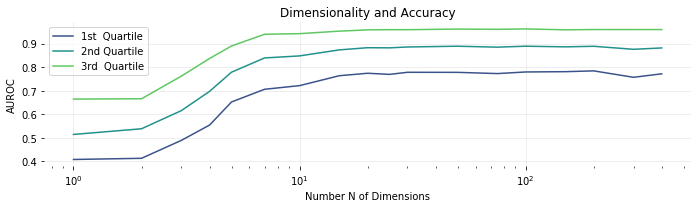

In [28]:
plt.rcParams["figure.figsize"] = (9.8,3)
plt.plot(nvals, med[0], color=plt.cm.viridis(0.25))
plt.plot(nvals, med[1], color=plt.cm.viridis(0.5))
plt.plot(nvals, med[2], color=plt.cm.viridis(0.75))

plt.title("Dimensionality and Accuracy")

plt.xscale('log')

plt.ylabel('AUROC')
plt.xlabel('Number N of Dimensions')
plt.legend(['1st  Quartile', '2nd Quartile', '3rd  Quartile'])
plt.box(False)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)
ax.xaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.xaxis.grid(zorder=0)

plt.savefig("new plots/dims.pdf",bbox_inches='tight')

# FUTURO

In [26]:
pp = papers("lattes")
maps = research_space("lattes", pp)
maps.compute(1990, 2004)

guevara(1990, 2004, 0.1)
chinazzi(1990, 2004, 0.1, 200)


In [27]:
presence = pp.presence(2002, 2004)
indices = maps.phi["guevara(1990, 2004, 0.1)"][1]
scientists = entities(presence, indices)

In [28]:
guev = maps.phi["guevara(1990, 2004, 0.1)"][0]
chin = maps.phi["chinazzi(1990, 2004, 0.1, 200)"][0]

In [51]:
ground_truths = [pp.presence(x, x+2) for x in range(2005, 2015)]
scientists_futures = [entities(gt, indices) for gt in ground_truths]

In [52]:
auc = pr.predict_futures(scientists, guev, indices, "inactive-active", scientists_futures)
np.save("__rscache__/auc_futuro_1990.npy", auc, allow_pickle=True)

38185 out of 52177 scores couldn't be computed.


In [33]:
auc = np.load("__rscache__/auc_futuro_1990.npy", allow_pickle=True)
# [len(x) for x in auc]

In [53]:
auc2 = pr.predict_futures(scientists, chin, indices, "inactive-active", scientists_futures)
np.save("__rscache__/auc_futuro_chin_1990.npy", auc2, allow_pickle=True)

38185 out of 52177 scores couldn't be computed.


In [30]:
auc2 = np.load("__rscache__/auc_futuro_chin_1990.npy", allow_pickle=True)
# [len(x) for x in auc]

In [40]:
bkp1 = auc.copy()
bkp2 = auc2.copy()

In [32]:
[len(x) for x in auc]

[54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651,
 54651]

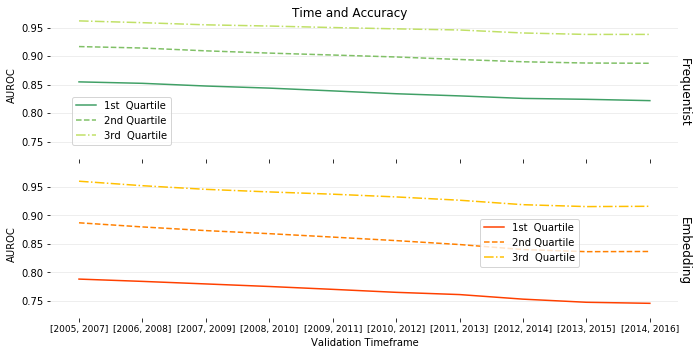

In [34]:
plt.rcParams["figure.figsize"] = (9.8,5)

ax = plt.subplot(2,1,1)
med = np.percentile(auc, [25, 50, 75], axis=1)
times = [str([x, x+2]) for x in range(2005, 2015)]

plt.plot(times, med[0], color=plt.cm.summer(0.25))
plt.plot(times, med[1], color=plt.cm.summer(0.5), linestyle='--')
plt.plot(times, med[2], color=plt.cm.summer(0.75), linestyle='-.')

plt.title("Frequentist", rotation=270,x=1.01,y=0.2)

plt.ylabel('AUROC')
plt.xlabel('')
plt.legend(['1st  Quartile', '2nd Quartile', '3rd  Quartile'],bbox_to_anchor=(0.2, .45))
plt.box(False)
plt.tight_layout()

ax.set_ylim([0.72, .98])
ax.set_xticklabels([])
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)



ax = plt.subplot(2,1,2)
med = np.percentile(auc2, [25, 50, 75], axis=1)
times = [str([x, x+2]) for x in range(2005, 2015)]

plt.plot(times, med[0], color=plt.cm.autumn(0.25))
plt.plot(times, med[1], color=plt.cm.autumn(0.5), linestyle='--')
plt.plot(times, med[2], color=plt.cm.autumn(0.75), linestyle='-.')

plt.title("Embedding", rotation=270,x=1.01,y=0.2)

plt.ylabel('AUROC')
plt.xlabel('Validation Timeframe')
plt.legend(['1st  Quartile', '2nd Quartile', '3rd  Quartile'],bbox_to_anchor=(0.85, .7))
plt.box(False)
plt.tight_layout()

ax.set_ylim([0.72, .98])
ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)

plt.xticks(fontsize=9)
plt.suptitle("Time and Accuracy")

# plt.show()
plt.savefig("new plots/futuro.pdf",bbox_inches='tight')

In [42]:
len(bkp1)

11

In [131]:
maps.compute(2000, 2013, model="chinazzi", N=1000)

chinazzi(2000, 2013, 0.1, 1000)


# EXPERIMENTO FINAL: CHINAZZI FIGURA 6

In [1]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space
from MapSci.entities import entities
import MapSci.agg as agg
import MapSci.predict as pr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inter = [1993, 1996, 1999, 2002, 2005, 2008, 2011]

In [3]:
pp = papers("lattes")
maps = research_space("lattes", pp)
aucs = dict()

for init in inter:
    print(init)
    end = init + 2
    maps.compute(init, end)
    msg_guev = "guevara({}, {}, 0.1)".format(init, end)
    msg_chin = "chinazzi({}, {}, 0.1, 200)".format(init, end)
    
    guev = maps.phi[msg_guev][0]
    chin = maps.phi[msg_chin][0]
    spaces = [guev, chin]
    
    presence = pp.presence(init, end)
    indices = maps.phi[msg_guev][1]
    scientists = entities(presence, indices)
    
    ground_truth = pp.presence(end+1, end+3)
    scientists_future = entities(ground_truth, indices)
    
    auc, computed = pr.predict_all(scientists, spaces, indices, 'inactive-active', scientists_future)
    aucs[init] = (auc, computed)
    
np.save("__rscache__/aucs_ULTIMATE_FINAL_COMPLETO_CANSEI_2.npy", aucs, allow_pickle=True)

1993
guevara(1993, 1995, 0.1)
chinazzi(1993, 1995, 0.1, 200)
9677 out of 19781 scores couldn't be computed.
1996
guevara(1996, 1998, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(1996, 1998, 0.1, 200)
13470 out of 28740 scores couldn't be computed.
1999
guevara(1999, 2001, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(1999, 2001, 0.1, 200)
17886 out of 39765 scores couldn't be computed.
2002
guevara(2002, 2004, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(2002, 2004, 0.1, 200)
22529 out of 52177 scores couldn't be computed.
2005
guevara(2005, 2007, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(2005, 2007, 0.1, 200)
26594 out of 65767 scores couldn't be computed.
2008
guevara(2008, 2010, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(2008, 2010, 0.1, 200)
30412 out of 79870 scores couldn't be computed.
2011
guevara(2011, 2013, 0.1)


/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


chinazzi(2011, 2013, 0.1, 200)
34672 out of 89323 scores couldn't be computed.


In [3]:
aucs_dict = np.load("__rscache__/aucs_ULTIMATE_FINAL_COMPLETO_CANSEI_2.npy", allow_pickle=True).item()
aucs = aucs_dict[1993][0] + aucs_dict[1996][0] + aucs_dict[1999][0] + aucs_dict[2002][0] + aucs_dict[2005][0] + aucs_dict[2008][0] + aucs_dict[2011][0]

In [5]:
def __adj_val(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, max(vals))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, min(vals), q1)
    return lower_adjacent_value, upper_adjacent_value

def __axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

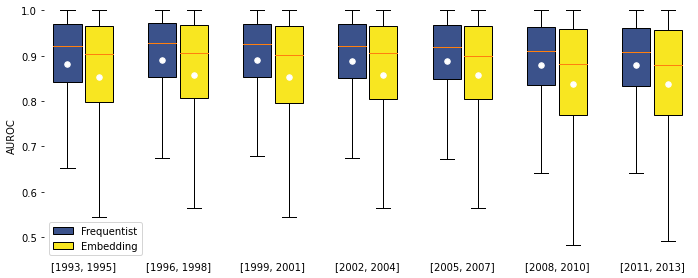

In [11]:
plt.rcParams["figure.figsize"] = (9.8,4)
ax = plt.subplot(1,1,1)
# ax.set_title("AUC ROC curve distributions")
pos = np.array([1,2,4,5,7,8,10,11,13,14,16,17,19,20])/20 * 13.5 + 0.5
parts = ax.boxplot(aucs, positions=pos, widths=0.6, patch_artist=True, showfliers=False)

colors = [plt.cm.viridis(0.25), plt.cm.viridis(0.99)]*7
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)
mean = [np.mean(x) for x in aucs]

ax.scatter(pos, mean, marker='o', color='white', s=30, zorder=4)
plt.ylabel('AUROC')
plt.xlabel("")
plt.box(False)
plt.tight_layout()

ax.yaxis.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
ax.yaxis.grid(zorder=0)

ax.set_ylim([0.45,1])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

for i in range(len(inter)):
    init = inter[i]
    plt.text((pos[2*i]+pos[2*i+1])/2, 0.43, str([init, init+2]), size=10, ha='center')

# plt.legend(['Frequentist', 'Embedding'],bbox_to_anchor=(0.8, .25))
ax.legend([parts["boxes"][0], parts["boxes"][1]], ['Frequentist', 'Embedding'])
plt.savefig("new plots/chinazzi_exp.pdf",bbox_inches='tight')
# plt.show()